In [1]:
base_url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/'

In [2]:
series = {'id': 'LNS11300000',
          'name': 'Labor Force Participation Rate'}

In [3]:
data_url = '{}{}'.format(base_url, series['id'])
print(data_url)

https://api.bls.gov/publicAPI/v1/timeseries/data/LNS11300000


In [5]:
import requests

r = requests.get(data_url, verify=False).json()
print('Status: ' + r['status'])

C:\Users\16308\anaconda3\envs\PythonDataa38\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.bls.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


Status: REQUEST_SUCCEEDED


In [6]:
print(r.keys())

dict_keys(['status', 'responseTime', 'message', 'Results'])


In [7]:
r = r['Results']['series'][0]['data']
print(r[0])

{'year': '2022', 'period': 'M01', 'periodName': 'January', 'latest': 'true', 'value': '62.2', 'footnotes': [{}]}


In [8]:
import pandas as pd

dates = ['{} {}'.format(i['period'], i['year']) for i in r]
index = pd.to_datetime(dates)
data = {series['id']: [float(i['value']) for i in r],
        'footnotes': [i['footnotes'][0] for i in r]}

df = pd.DataFrame(index=index, data=data).iloc[::-1]

df.tail(3)

,LNS11300000,footnotes
2021-01-01 00:00:11,61.9,{}
2021-01-01 00:00:12,61.9,{}
2022-01-01 00:00:01,62.2,{}


<AxesSubplot:title={'center':'Labor Force Participation Rate'}>

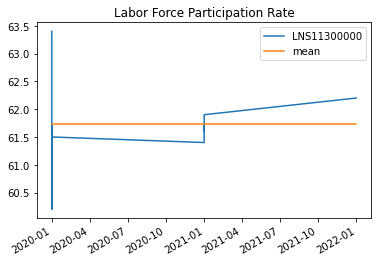

In [9]:
%matplotlib inline

df['mean'] = df[series['id']].mean()
df[[series['id'], 'mean']].plot(title=series['name'])

In [10]:
import config # .py file with bls_key = 'API key here'

# The url for BLS API v2
url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

In [11]:
key = '?registrationkey={}'.format(config.bls_key)

In [38]:
# Series stored as a dictionary

# Labor Force Participation Series 
#series_dict = {
    #'LNS11327659': 'No High School Diploma',
    #'LNS11327660': 'High School Diploma',
    #'LNS11327689': 'Some College/Associates Degree',
    #'LNS11327662': 'Bachelors Degree or Higher'}

    # Unmployment Rate Series 
series_dict = {
    'LNS14027659': 'No High School Diploma',
    'LNS14027660': 'High School Diploma',
    'LNS14027689': 'Some College/Associates Degree',
    'LNS14027662': 'Bachelors Degree or Higher'}

# Start year and end year
dates = ('2019', '2021')

In [39]:
import json

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

In [40]:
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear": dates[1]})

In [41]:
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']

In [42]:
# Date index from first series
date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in p[0]['data']]

# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    df[series_dict[s['seriesID']]] = pd.Series(
        index = pd.to_datetime(date_list),
        data = [i['value'] for i in s['data']]
        ).astype(float).iloc[::-1]

# Show last 5 results
df.head()

,No High School Diploma,High School Diploma,Some College/Associates Degree,Bachelors Degree or Higher
2019-01-01,5.7,3.8,3.5,2.4
2019-02-01,5.2,3.8,3.2,2.2
2019-03-01,5.8,3.7,3.3,2.1
2019-04-01,5.3,3.4,3.0,2.1
2019-05-01,5.1,3.5,2.7,2.1


In [44]:
df.tail()

,No High School Diploma,High School Diploma,Some College/Associates Degree,Bachelors Degree or Higher
2021-08-01,7.8,5.9,4.9,2.7
2021-09-01,7.7,5.7,4.5,2.5
2021-10-01,7.3,5.4,4.3,2.4
2021-11-01,5.5,5.2,3.7,2.2
2021-12-01,5.2,4.6,3.6,2.1


<AxesSubplot:title={'center':'Unemployment Rate by Education Level'}>

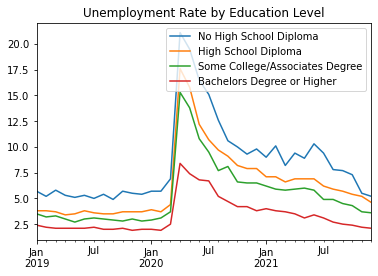

In [43]:
df.plot(title='Unemployment Rate by Education Level')

<AxesSubplot:title={'center':'Labor Force Participation by Education Level'}>

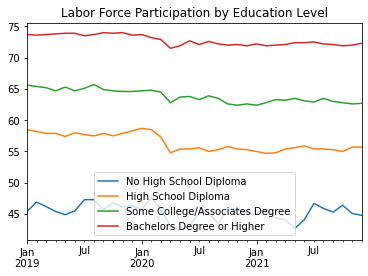

In [17]:
# Simple line plot of the data
df.plot(title='Labor Force Participation by Education Level')